In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from collections import namedtuple, OrderedDict
# import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from pf.pfasst import PFASST, Experiment, Params
# from tqdm import tqdm_notebook as tqdm
    
exe = '/home/bkrull/devel/pfasst-nwchem/libpfasst/tests/imk/main.exe'
exp = Experiment()

# sns.set()
# sns.set_style("whitegrid", {"legend.frameon": True})
# sns.set_context("paper")
# colors = sns.color_palette()

results = OrderedDict()
results['Lob-2'] = {'nodes': [2], 'magnus': [1], 'qtype': 'lobatto', 'val':[]}
results['Lob-4-1'] = {'nodes': [3], 'magnus': [2], 'qtype': 'lobatto', 'val':[]}
results['Leg-2'] = {'nodes': [2], 'magnus': [1], 'qtype': 'gauss', 'val':[]}
results['Leg-4-3'] = {'nodes': [3], 'magnus': [2], 'qtype': 'gauss', 'val':[]}
results['Leg-6'] = {'nodes': [3], 'magnus': [3], 'qtype': 'gauss', 'val':[]}

# Toda solutions
The plots below show periodic and non-periodic 11-particle Toda lattice solutions. Plots indicate the back-transformed original variables.

env: OMP_NUM_THREADS=1
env: OPENBLAS_NUM_THREADS=1


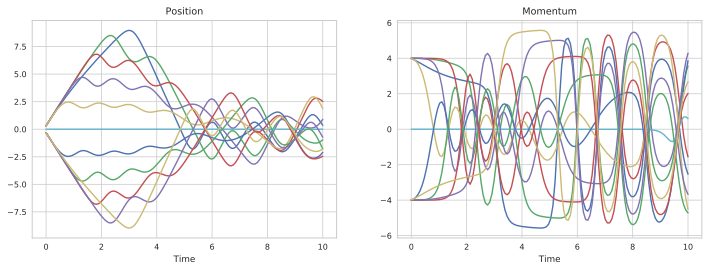

In [16]:
%rm output/*particles_11*
%set_env OMP_NUM_THREADS=1
%set_env OPENBLAS_NUM_THREADS=1

params_11 = Params(nodes=[3], inttype='imk', nterms=[5],
                   qtype='lob', nsteps=128, solutions=True)
toda_11 = PFASST(exe, params_11)

results_gauss = toda_11.run()[0]

fig, (ax1, ax2) = toda_11.plot_toda(results_gauss)
# fig.savefig(results_home+'toda-solution.png', dpi=300)

# Convergence Behavior
Maximum absolute error of $\mathbf{L}$ at time $t = 10.0$ as a function of the number of steps for a periodic 11-particle Toda lattice. The reference solution is taken as the solution using 3 Gauss-Legendre nodes and two terms in the Magnus Expansion with a time step of $\Delta t = t * 2^{-14}$. 

env: OMP_NUM_THREADS=1
env: OPENBLAS_NUM_THREADS=1



slope = 2.05535972427



slope = 2.08011908267


NameError: name 'results_home' is not defined

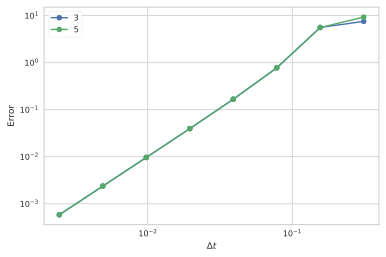

In [7]:
%rm output/*particles_11*
%set_env OMP_NUM_THREADS=1
%set_env OPENBLAS_NUM_THREADS=1

fig, ax = plt.subplots()
ax.set_ylabel('Error')
ax.set_xlabel('$\Delta t$')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
ax.grid(True)

pltkwargs = {'loglog': True, 
             'grid': True, 
             'ax': ax,
             'marker': 'o'}

nsteps = 128
nparticles = 11
periodic = True
tfinal = 10.0
params = Params(tfinal=tfinal, tasks=1, levels=1, nodes=[5],
                sweeps_pred=[1], sweeps=[1], inttype='imk',
                particles=nparticles, periodic=periodic, tolerance=1e-14, qtype='lob',
                iterations=25, nsteps=8, solutions=False, timings=False)
toda = PFASST(exe, params)

nsteps = range(5,13)
# for k, r in tqdm(results.iteritems(), total=len(results), desc='method progress'):
for nodes in [3, 5]:
    toda.p.nodes = [nodes]
    toda.p.nterms = [nodes*2]
    r = exp.convergence_exp(toda, steps=nsteps)
    ax.plot(r.dt.values, r.error.values, label=str(toda.p.nodes[0]), marker='o')

ax.legend()
# fig.savefig(results_home+'toda-conv.png', dpi=300)

env: OMP_NUM_THREADS=1
env: OPENBLAS_NUM_THREADS=1


slope = 1.52224472041


slope = 3.86237991302


slope = 1.72839892535


slope = 3.75319817571


slope = 4.52529582536



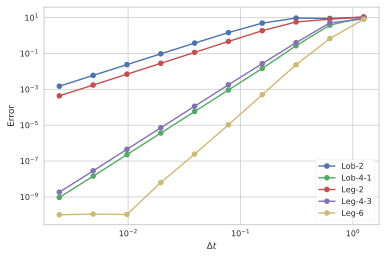

In [29]:
%rm output/*particles_50*
%set_env OMP_NUM_THREADS=1
%set_env OPENBLAS_NUM_THREADS=1

fig, ax = plt.subplots()
ax.set_ylabel('Error')
ax.set_xlabel('$\Delta t$')
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
ax.grid(True)

pltkwargs = {'loglog': True, 
             'grid': True, 
             'ax': ax,
             'marker': 'o'}
nsteps = range(3,13)

params = Params(tfinal=10.0, tasks=1, sweeps_pred=[2], sweeps=[1], nodes=[3], magnus=[3], 
                particles=50, iterations=100, tolerance=1e-12, qtype='gauss',
                periodic=True, verbose=False, solutions=False, timings=False)
toda = PFASST(exe, params)

for k, r in tqdm(results.iteritems(), total=len(results), desc='method progress'):
    toda.p.nodes = r['nodes']
    toda.p.magnus = r['magnus']
    toda.p.qtype = r['qtype']
    r['val'] = exp.convergence_exp(toda, steps=nsteps)
    ax.plot(r['val'].dt.values, r['val'].error.values, label=k, marker='o')

ax.legend()
fig.savefig(results_home+'toda-conv.png', dpi=300)

# Behavior of iterates for each processor

The average number of iterations for the $N$th processor is higher than for the first processor, but the increase only moderately decreases the efficiency of the overall calculation.

---- running pfasst: tasks=16, nodes=3, magnus=3, dt=0.078125 ----


---- running pfasst: tasks=16, nodes=3, magnus=3, dt=0.009765625 ----



slope = 3.38587219175


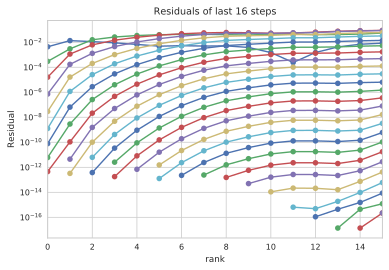

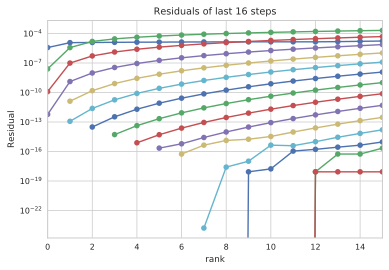

In [24]:
%rm output/*particles_11*tasks_16*
lvls = 1
nsteps = [7, 10]

params = Params(tfinal=10.0, tasks=16, levels=lvls, 
                sweeps_pred=[2]*lvls, sweeps=[1]*lvls, nodes=[3]*lvls, magnus=[3]*lvls, 
                particles=11, iterations=120, tolerance=1.0e-12, qtype='gauss',
                periodic=True, verbose=True, solutions=False, timings=False)
toda = PFASST(exe, params)
results6_mpi = exp.convergence_exp(toda, steps=nsteps)

fig, ax = results6_mpi.plot_residual_vs_cpu_for_each_iteration(idx=0, legend=False)
fig.savefig(results_home+'toda-res_vs_cpu_mpi16-nsteps{}.png'.format(2**nsteps[0]), dpi=300)

fig, ax = results6_mpi.plot_residual_vs_cpu_for_each_iteration(idx=1, legend=False)
fig.savefig(results_home+'toda-res_vs_cpu_mpi16-nsteps{}.png'.format(2**nsteps[1]), dpi=300)

## Convergence behavior with respect to the order of the method
### A comparison between the different order methods using 3 Gauss nodes, highlighting the different convergence behavior between adding additional terms in the expansion 

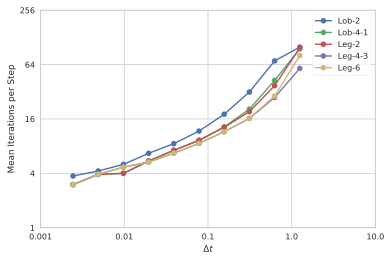

In [32]:
fig, ax = plt.subplots()

for k, rr in results.iteritems():
    if type(r) is list:
        continue
        
    r = rr['val']
    ax.plot(r.dt.values, 
            r.iterations.values, label=k, marker='o')

ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
ax.set_xlabel('$\Delta t$')
ax.set_ylabel('Mean Iterations per Step')
ax.legend()

dt = np.linspace(-3, 1, num=5)
dt = np.power(10, dt).astype(np.float_)

iters = np.linspace(0, 8, num=5)
iters = np.power(2, iters).astype(np.float_)

ax.set_xticks(dt)
ax.set_xticklabels(dt)
ax.set_yticks(iters)
ax.set_yticklabels(map(int, iters))

# fig.savefig(results_home+'toda-iterations-full-comp.png', dpi=300)

# Convergence behavior with respect to number of pipelined processors

In this regard, we expect that the average number of iterations increases as the more processors are used. What we do gain instead, since we're doing PinT, is that there should be a speedup because the number of iterations being computed are being done simultaneously instead of serially.

## Theoretical performance gains
Total parallel time, $T_p = N(1+ \frac{K_p}{p})$, where $N$ is the number of steps, $K_p$ is the number of required iterations in the parallel case, and $p$ is the number of processors.

Total serial time, $T_s = N*K_s$, where $K_s$ is the number of required iterations in the serial case.

Speedup $S = T_s / T_p = K_s/(1+\frac{K_p}{p})$

Efficiency $E = S / p$

In [ ]:
Speedups = namedtuple('Speedups', ['ks', 'kp', 'p'])
def calc_speedup(s):
    return s.ks/(1+s.kp/s.p)
def calc_eff(s):
    return calc_speedup(s)/s.p

In [ ]:
# %rm output/*coarsemagnus_3*
fig2, ax2 = plt.subplots()
lvls = 1

params = Params(tfinal=1.0, tasks=1, levels=lvls, 
                sweeps_pred=[2]*lvls, sweeps=[1]*lvls, nodes=[3]*lvls, magnus=[3]*lvls, 
                particles=11, iterations=1000, tolerance=1e-12, qtype='gauss',
                periodic=True, verbose=True, solutions=False, timings=False)
toda = PFASST(exe, params)

for i in tqdm(range(0, 7)):
    tasks = 2**i
    toda.p.tasks = tasks
    step1 = 2 if i < 3 else i
    nsteps = range(step1,10)
    r = exp.convergence_exp(toda, steps=nsteps)
    label_str = '$N_p = {}$'
    ax2.plot(r.nsteps, r.iterations, 
             label=label_str.format(tasks), marker='o')
    
ax2.legend()
ax2.set_xscale("log", nonposx='clip')
ax2.set_yscale("log", nonposy='clip')
ax2.set_xlabel('Number of steps')
ax2.set_ylabel('Mean Number of Iterations')

nsteps = np.linspace(0, 10, num=6)
nsteps = np.power(2, nsteps).astype(np.float_)

iters = np.linspace(1, 5, num=5)
iters = np.power(2, iters).astype(np.float_)

ax2.set_xticks(nsteps)
ax2.set_xticklabels(map(int, nsteps))
ax2.set_yticks(iters)
ax2.set_yticklabels(map(int, iters))

fig2.savefig(results_home+'toda-iterations-mpi-order6.png', dpi=300)

In [ ]:
fig, ax = plt.subplots()
data = []
ks = results[0][1].loc[6, 'iterations']

for (tasks, r) in results:
    iters = r[r['nsteps'] == 64].iterations.values[0]
    data.append(Speedups(ks, iters, tasks))

speedups = []
effs = []
for i in data:
    spdup = calc_speedup(i)
    speedups.append(spdup)
    eff = calc_eff(i)
    effs.append(eff)
    print "speedup: {}, efficiency: {}".format(spdup, eff)    

nprocs = [2**i for i in range(3, 10)]
ax.plot(nprocs, speedups, marker='o', color=colors[0], label='Speedup')  
ax.set_ylabel('Speedup')
ax2 = ax.twinx()
ax2.plot(nprocs, effs, marker='o', color=colors[1], label='Efficiency')
ax2.set_ylabel('Efficiency')

ax.legend();

## Wall time scaling with respect to order and pipeline parallel

## Time to solution for the different orders and pipelined-parallel methods

Note: this is a precursor plot to the pareto-type plot I'm actually after



In [ ]:
fig, ax = plt.subplots()

for k, r in results.iteritems():
    if type(r) is list:
        continue
    
    times = []

    for time in r['val'].total_times:
        times.append(sum(time.values()))
        
    ax.plot(r['val'].nsteps.values, times, marker='o', label=k)

ax.set_xlabel('Number of steps')
ax.set_ylabel('Wall Time (seconds)')
ax.legend()

# ax.set_xscale('log', nonposx='clip')
# nsteps = np.linspace(2, 12, num=11)
# nsteps = np.power(2, nsteps).astype(np.float_)
# ax.set_xticks(nsteps)
# ax.set_xticklabels(nsteps)
fig.savefig(results_home+'toda-time.png', dpi=300)

## The Pareto-type Plot

The idea here is to show that given your two parameters, wall-clock and error, one would like to find the ideal method that minimizes the error and time-to-solution simultaneously. Only at very poor solutions (very large error) does it seem that a second-order method is worth using. For errors < $10^{-4}$, the fastest time-to-solution is achieved by the sixth order method, followed by fourth, followed by second. 

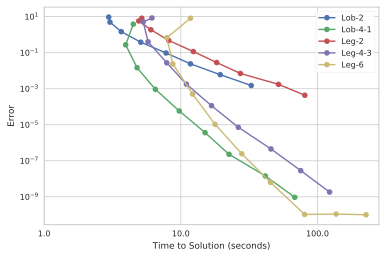

In [31]:
fig, ax = plt.subplots()

for k, r in results.iteritems():
    if type(r) is list:
        continue
    
    times = []

    for time in r['val']['total_times']:
        times.append(sum(time.values()))
        
    """ this is just to declutter plot from points that have O(1) error but more time steps"""
    if k == 'Lob-2':
        ax.plot(times[2:], r['val'].error.values[2:], marker='o', label=k)
    elif k == 'Lob-4-1' or k == 'Leg-2':
        ax.plot(times[1:], r['val'].error.values[1:], marker='o', label=k)
    else:
        ax.plot(times, r['val'].error.values, marker='o', label=k)

ax.grid(True)
ax.legend()
ax.set_xlabel('Time to Solution (seconds)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Error')

dt = np.linspace(0, 2, num=3)
dt = np.power(10, dt).astype(np.float_)
ax.set_xticks(dt)
ax.set_xticklabels(dt)

# fig.savefig(results_home+'toda-pareto-serial.png', dpi=300)